In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from nltk.tokenize import word_tokenize
from nltk.corpus import words
import numpy as np
from scipy.signal import savgol_filter

# Define Functions

In [245]:
def pos_or_not(tweet_sentiment):
    if(tweet_sentiment>0):
        return 1
    else :
        return 0

# Import Datasets

In [246]:
tweets = pd.read_csv('tweets_raw_day.csv')
btc = pd.read_csv('btc_raw_day.csv')
google_trends = pd.read_csv('google_trends_raw_day.csv')

print(len(tweets))
print(len(btc))
print(len(google_trends))

8808386
2276
365


# Hashtags + Text = Lowercase

In [247]:
tweets['Hashtags'] = tweets['Hashtags'].str.lower()
tweets['Text'] = tweets['Text'].str.lower()

# Remove spams

In [248]:
tweets = tweets.drop_duplicates(subset = 'Text')
print(len(tweets))

6097986


# Remove tweets with noise

# 1. Hashtags

In [249]:
to_drop = ['#lottery', '#makemoney', '#free', '#bet', '#freebitcoin', '#webbot', '#freeminingsoftware',
          '#yabtcl', '#bitcoinbet','#tradingtool', '#trading', '#residualbitcoin', '#faucet', '#venezuela', '#casino'
          '#sportsbook','#soccer', '#game', '#simplefx', '#nitrogensportsbook', '#makemoney', '#makeyourownlane', 
          '#livescoregoal', '#livescore', '#bitcoinprice', '#price', '#mpgvip', '#footballcoin', '#earnbitcoin']

for i in to_drop:
    tweets = tweets[tweets.Hashtags.str.contains(i) == False]
print (len(tweets))

3319480


# 2. Spesific Words

In [250]:
to_drop = ['free', 'trading', 'price', 'win', 'game', 'performing currency', 'altcoin', 'fintech', 'pic']

for i in to_drop:
    tweets = tweets[tweets.Text.str.contains(i) == False]
print (len(tweets))

1548561


# Merge tweets By Timestamp

In [383]:
tweets_by_timestamp = tweets.groupby(['Timestamp'], as_index=False).mean()
tweets_by_timestamp.drop('Unnamed: 0', axis=1 ,inplace = True)

# Count Tweets per Day

In [384]:
count = pd.DataFrame(data = tweets.Timestamp.value_counts())
count.reset_index(inplace=True)
count.columns = ['Timestamp', 'Count_of_Tweets']
tweets_by_timestamp = pd.merge(tweets_by_timestamp, count)
tweets_by_timestamp['Count_of_Tweets_Savgol'] = savgol_filter(tweets_by_timestamp['Count_of_Tweets'], 31, 3)

# Count Possitive tweets per Day

In [385]:
tweets['Positive_Or_Not'] = tweets['Polarity_Vader'].map(pos_or_not)
tweets_count = tweets.groupby(['Timestamp'], as_index=False).sum()
tweets_by_timestamp['Count_Of_Possitive_Tweets'] = tweets_count['Positive_Or_Not']
tweets_by_timestamp['Count_Of_Possitive_Tweets_Savgol'] = savgol_filter(tweets_by_timestamp['Count_Of_Possitive_Tweets'], 31, 3)

In [386]:
# tweets_by_timestamp

In [387]:
data1 = pd.merge(tweets_by_timestamp, btc , on='Timestamp', how='inner')
data = pd.merge(data1, google_trends , on='Timestamp', how='inner')

# Create the new Columnt : 1 If sentiment from yesterday rise. 0 -> if not 
sentiment_one_houre_before = data['Polarity_Vader'].shift(+1)
sentiment_now = data['Polarity_Vader']
data['Up_or_Down_Sentiment'] = np.where( (sentiment_one_houre_before - sentiment_now) < 0 , 1, 0)

#Last modifications
data.drop('Unnamed: 0_y', axis=1,inplace = True)

In [400]:
# Keep 4 months
# data = data.iloc[1:365]
data.to_csv('tweet_n_btc_day.csv')
len(data)

365

# Print Data 

In [389]:
data

,Timestamp,Polarity_Textblob,Polarity_Vader,A_Lot_Likes,Emoticons,Positive_Or_Not,Count_of_Tweets,Count_of_Tweets_Savgol,Count_Of_Possitive_Tweets,Count_Of_Possitive_Tweets_Savgol,...,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Up_or_Down,Trend_Values,Up_or_Down_Sentiment
0,2017-01-01,0.097399,0.106238,0.017454,0.0,0.343550,2349,2969.612299,807,1069.304619,...,962.93,963.24,962.93,962.93,5.182757,4990.698006,962.942638,1,46,0
1,2017-01-02,0.096328,0.092475,0.010504,0.0,0.323880,2856,3022.992820,925,1059.602639,...,1002.99,1003.00,1002.99,1002.99,1.622845,1627.697656,1002.990389,1,74,0
2,2017-01-03,0.102522,0.106177,0.011521,0.0,0.384793,3038,3063.498816,1169,1049.000114,...,1012.00,1012.00,1012.00,1012.00,0.015222,15.404664,1012.000000,1,69,1
3,2017-01-04,0.076846,0.075768,0.015101,0.0,0.339485,3576,3092.064854,1214,1037.626454,...,1021.42,1021.45,1021.42,1021.45,0.377859,385.961519,1021.443639,1,81,0
4,2017-01-05,0.085428,0.071681,0.009753,0.0,0.325924,4409,3109.625496,1437,1025.611070,...,1090.00,1090.00,1090.00,1090.00,0.053059,57.834016,1090.000000,0,100,0
5,2017-01-06,0.065092,0.028068,0.007719,0.0,0.292521,3757,3117.115307,1099,1013.083375,...,974.50,975.00,973.18,975.00,24.263116,23653.115391,974.858920,0,82,0
6,2017-01-07,0.107563,0.107273,0.006713,0.0,0.394965,3575,3115.468851,1412,1000.172780,...,896.77,897.00,893.03,894.43,8.878701,7958.917078,896.405617,0,71,1
7,2017-01-08,0.085584,0.070425,0.008542,0.0,0.336893,1873,3105.620693,631,987.008697,...,889.77,889.77,889.77,889.77,0.056059,49.879999,889.770000,1,64,0
8,2017-01-09,0.070511,0.059924,0.012072,0.0,0.314889,994,3088.505395,313,973.720535,...,906.76,906.76,904.58,906.56,10.027000,9076.538989,905.209832,0,61,0
9,2017-01-10,0.074474,0.073556,0.009212,0.0,0.348158,3148,3065.057523,1096,960.437709,...,891.90,891.90,891.90,891.90,0.851500,759.452850,891.900000,1,56,1


# Plot Btc price 

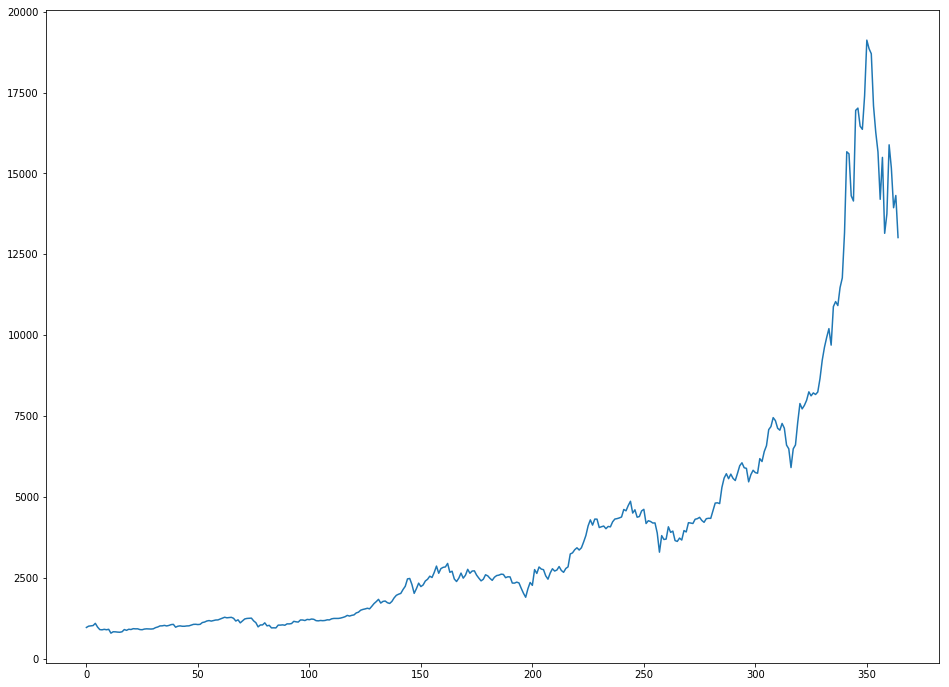

In [390]:
plt.figure(figsize=(16, 12))
plt.plot(data['Weighted_Price'])
plt.show()

# Plot Count_Of_Possitive_Tweets

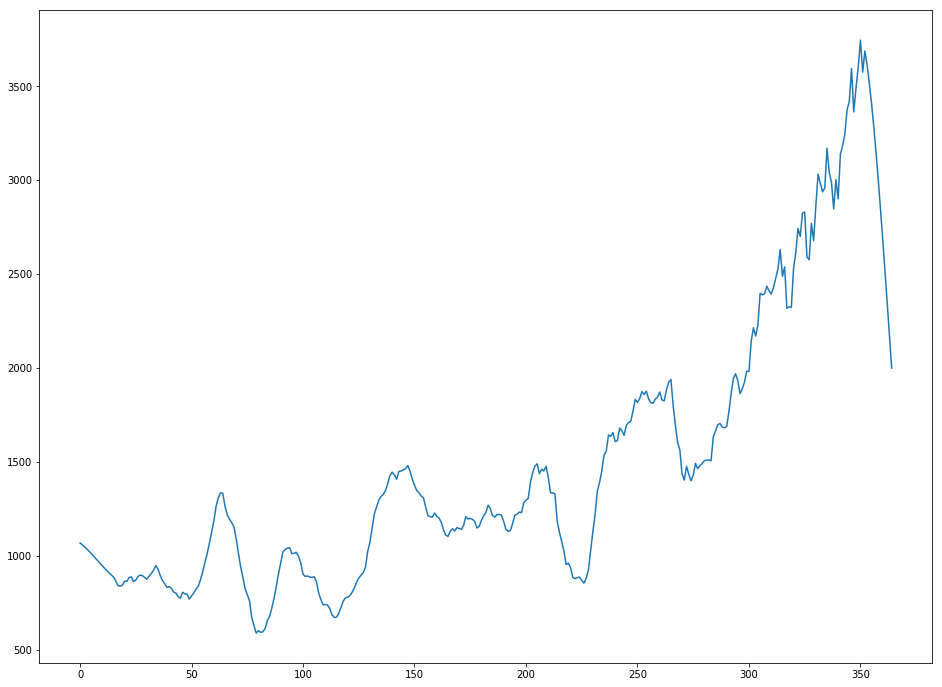

In [394]:
plt.figure(figsize=(16, 12))
plt.plot(data['Count_Of_Possitive_Tweets_Savgol'])
plt.show()

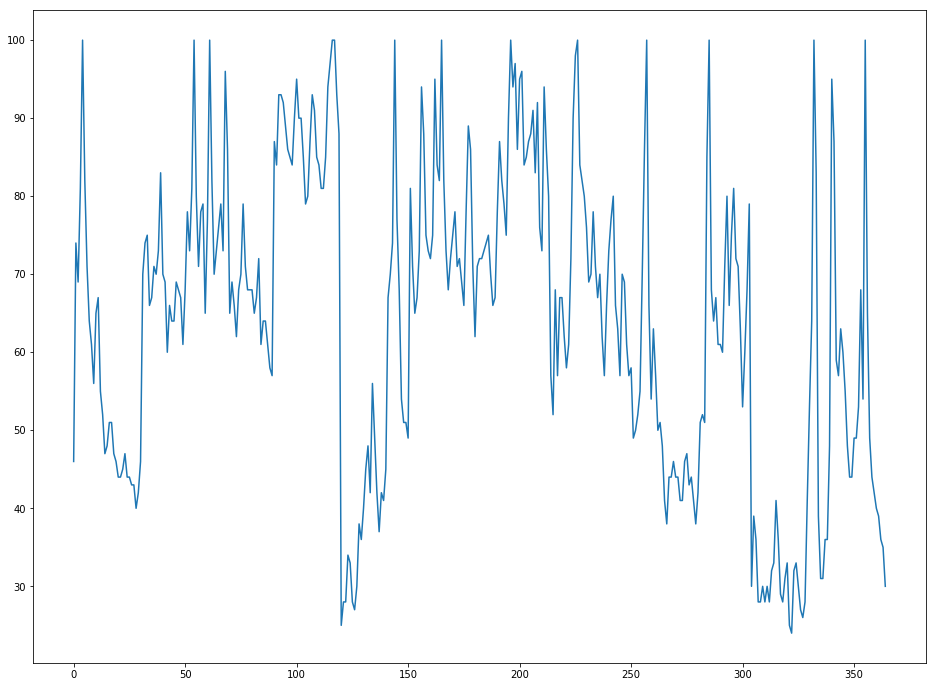

In [399]:
plt.figure(figsize=(16, 12))
plt.plot(data['Trend_Values'])
plt.show()